# Peoblem Statement

    1) Prepare a classification model using Naive Bayes 
    for salary data 

    Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
train= pd.read_csv('SalaryData_Train.csv')
train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test= pd.read_csv('SalaryData_Test.csv')
test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000
mean,38.490695,10.124001,1073.642692,88.679539,40.900885
std,13.179845,2.530582,7374.919691,403.399003,11.906083
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [ ]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.shape

(18645, 14)

In [ ]:
test.shape

(15060, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [ ]:
train['Salary']=le.fit_transform(train['Salary'])
train.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
test['Salary']=le.fit_transform(test['Salary'])
test.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1


In [ ]:
train['workclass'] = le.fit_transform(train['workclass'])
train['education'] = le.fit_transform(train['education'])
train['maritalstatus'] = le.fit_transform(train['maritalstatus'])
train['occupation'] = le.fit_transform(train['occupation'])
train['relationship'] = le.fit_transform(train['relationship'])
train['race'] = le.fit_transform(train['race'])
train['sex'] = le.fit_transform(train['sex'])
train['native'] = le.fit_transform(train['native'])

In [ ]:
test['workclass'] = le.fit_transform(test['workclass'])
test['education'] = le.fit_transform(test['education'])
test['maritalstatus'] = le.fit_transform(test['maritalstatus'])
test['occupation'] = le.fit_transform(test['occupation'])
test['relationship'] = le.fit_transform(test['relationship'])
test['race'] = le.fit_transform(test['race'])
test['sex'] = le.fit_transform(test['sex'])
test['native'] = le.fit_transform(test['native'])

In [ ]:
train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


<Axes: xlabel='Salary', ylabel='count'>

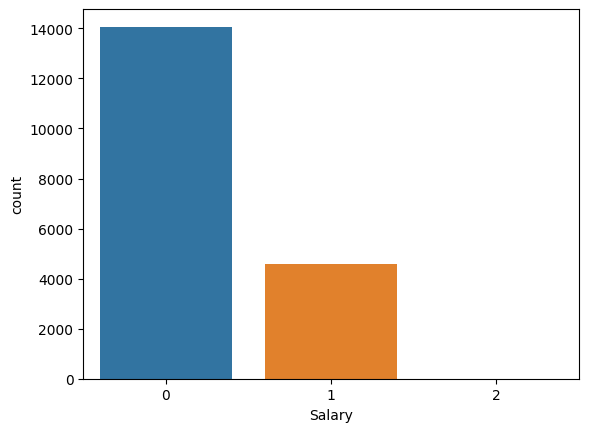

In [ ]:
sns.countplot(x='Salary',data= train)

<Axes: xlabel='Salary', ylabel='count'>

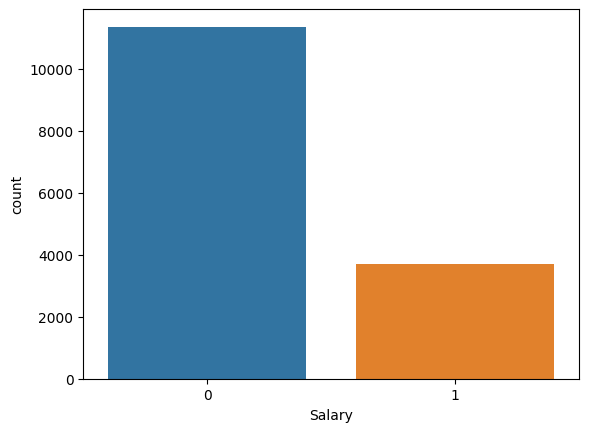

In [ ]:
sns.countplot(x='Salary',data= test)

<Axes: xlabel='occupation', ylabel='workclass'>

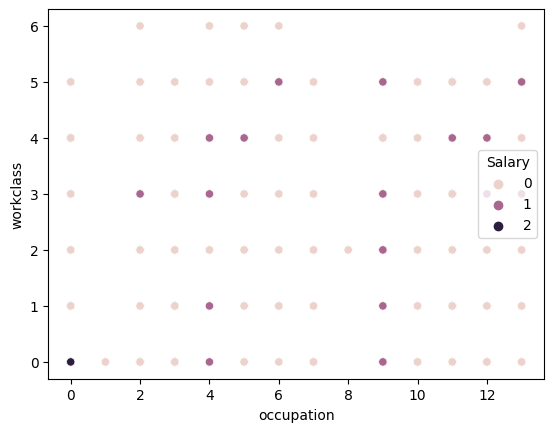

In [ ]:
sns.scatterplot(x=train['occupation'],y=train['workclass'],hue=train['Salary'])

<Axes: xlabel='occupation', ylabel='workclass'>

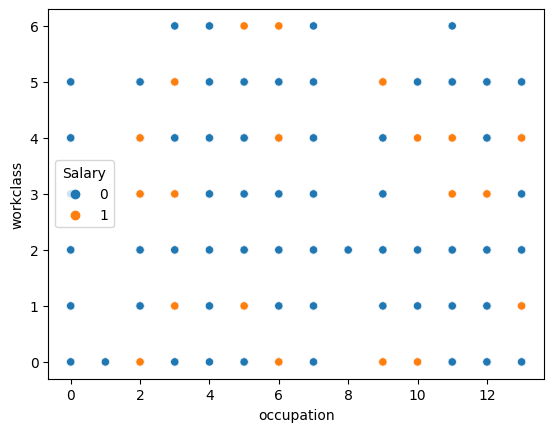

In [ ]:
sns.scatterplot(x=test['occupation'],y=test['workclass'],hue=test['Salary'])

<Axes: xlabel='education'>

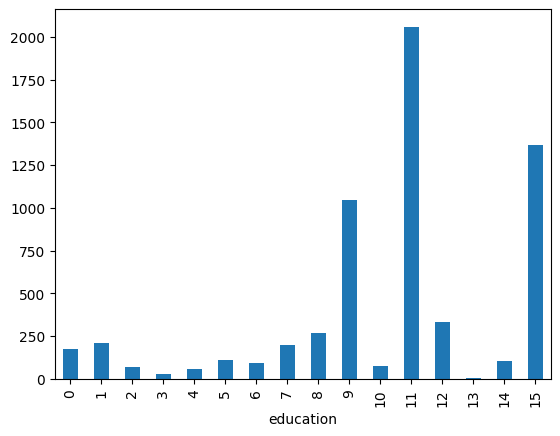

In [ ]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='education'>

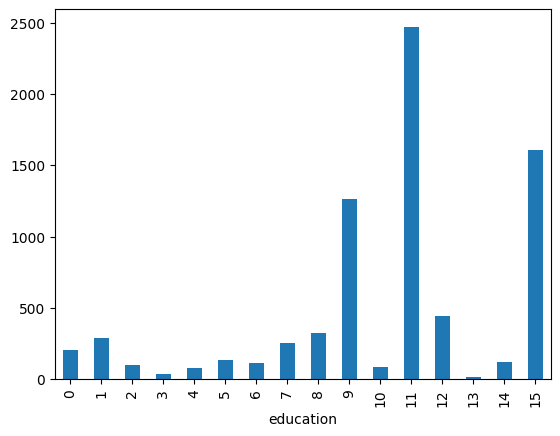

In [ ]:
pd.crosstab(test['Salary'],test['education']).mean().plot(kind='bar')

In [ ]:
train.shape, test.shape

((18645, 14), (15060, 14))

In [ ]:
xtrain = train.iloc[:,:-1]
ytrain = train['Salary']

In [ ]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,9,13,2,3,0,4,1,0,0,13,38
2,38,2,11,9,0,5,1,4,1,0,0,40,38
3,53,2,1,7,2,5,0,2,1,0,0,40,38
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18640,62,4,11,9,4,7,4,4,0,0,0,6,38
18641,44,2,15,10,0,2,1,4,1,0,0,55,38
18642,28,1,11,9,2,10,0,4,1,3908,0,40,38
18643,68,1,12,14,6,9,4,2,0,0,0,40,38


In [ ]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
18640    0
18641    0
18642    0
18643    1
18644    2
Name: Salary, Length: 18645, dtype: int64

In [ ]:
xtest = test.iloc[:,:-1]
ytest = test['Salary']

In [ ]:
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [ ]:
ytest

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb= MultinomialNB()

nb.fit(xtrain,ytrain)

ypred= nb.predict(xtest)

In [ ]:
print(classification_report(ytest, ypred))

In [ ]:
gnb= GaussianNB()
gnb.fit(xtrain,ytrain)

ypred= gnb.predict(xtest)

In [ ]:
print(classification_report(ytest, ypred))

In [ ]:
print(gnb.score(xtrain, ytrain))
print(gnb.score(xtest,ytest))